In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# Data Loading and Visualization

In [2]:
#Load data and remove the header row
data=pd.read_csv('./dataset3.csv',index_col=None,names=[' Amylinomimetics','Biguanides','Hexalen','Acetaminophen','Triazolam','Matulane','Estrostep Fe','Seasonale','Thermazene','Aprotinin','Ramelteon','Malarone','Chlorpheniramine','Motrin IB','Niaspan','Reaction'])
data=data.drop([0],axis=0)
data.head()

,Amylinomimetics,Biguanides,Hexalen,Acetaminophen,Triazolam,Matulane,Estrostep Fe,Seasonale,Thermazene,Aprotinin,Ramelteon,Malarone,Chlorpheniramine,Motrin IB,Niaspan,Reaction
1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,low
2,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,high
3,0,0,0,0,0,0,0,2,0,3,0,0,0,0,0,medium
4,2,0,0,0,0,0,0,0,0,3,0,0,0,0,0,low
5,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0,medium


In [3]:
data.describe()

,Amylinomimetics,Biguanides,Hexalen,Acetaminophen,Triazolam,Matulane,Estrostep Fe,Seasonale,Thermazene,Aprotinin,Ramelteon,Malarone,Chlorpheniramine,Motrin IB,Niaspan
count,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,0.403047,0.393446,0.397013,0.400080,0.394746,0.405380,0.394480,0.394846,0.398613,0.396680,0.398513,0.404580,0.408980,0.408747,0.401513
std,0.883654,0.870683,0.875045,0.880185,0.870152,0.887031,0.873904,0.873681,0.876488,0.876984,0.880044,0.882462,0.887896,0.889036,0.884766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


Text(0.5, 1.0, 'Data Visualization')

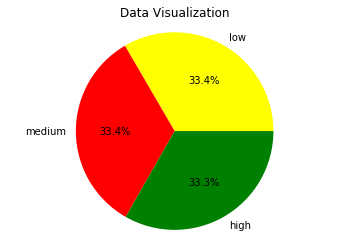

In [4]:
data['label']=data.Reaction.map({'low':0,'medium':1,'high':2})
fig, ax = plt.subplots(1, 1)
ax.pie(data.label.value_counts(),autopct='%1.1f%%', labels=['low','medium','high'], colors=['yellow','r','green'])
plt.axis('equal')
plt.title('Data Visualization')

# Pre-processing

In [5]:
#Fill empty values by 0
name=[' Amylinomimetics','Biguanides','Hexalen','Acetaminophen','Triazolam','Matulane','Estrostep Fe','Seasonale','Thermazene','Aprotinin','Ramelteon','Malarone','Chlorpheniramine','Motrin IB','Niaspan','Reaction']

for i in name:
    data[i].fillna(0,inplace=True)
    
data.head()

,Amylinomimetics,Biguanides,Hexalen,Acetaminophen,Triazolam,Matulane,Estrostep Fe,Seasonale,Thermazene,Aprotinin,Ramelteon,Malarone,Chlorpheniramine,Motrin IB,Niaspan,Reaction,label
1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,low,0
2,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,high,2
3,0,0,0,0,0,0,0,2,0,3,0,0,0,0,0,medium,1
4,2,0,0,0,0,0,0,0,0,3,0,0,0,0,0,low,0
5,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0,medium,1


In [6]:
#Labeling the data
data['label']=data.Reaction.map({'low':0,'medium':1,'high':2})
data['label']

1        0
2        2
3        1
4        0
5        1
        ..
29995    1
29996    2
29997    1
29998    0
29999    2
Name: label, Length: 29999, dtype: int64

In [7]:
# Consider Input and Output
Xtrain=data[[' Amylinomimetics','Biguanides','Hexalen','Acetaminophen','Triazolam','Matulane','Estrostep Fe','Seasonale','Thermazene','Aprotinin','Ramelteon','Malarone','Chlorpheniramine','Motrin IB','Niaspan']]
Ytrain=data['label']

In [8]:
#Train test split
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(Xtrain,Ytrain,test_size=0.1,random_state=20)
print('Number of Training samples :',len(xtrain))
print('Number of Test samples :',len(xtest))

Number of Training samples : 26999
Number of Test samples : 3000


# Decision Tree Algorithm

In [9]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [10]:
clf=tree.DecisionTreeClassifier()
clf.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
pred=clf.predict(xtest)
print(pred[:5])

[1 0 2 2 0]


In [12]:
print('Accuracy of decision tree algorithm is :',accuracy_score(ytest,pred)*100,'%')

Accuracy of decision tree algorithm is : 75.43333333333334 %


In [13]:
import pickle
filename = 'decision_tree_model.sav'
#pickle.dump(clf, open(filename, 'wb'))

In [14]:
filename = 'decision_tree_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result*100,'%')

75.43333333333334 %


# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [14]:
clf=RandomForestClassifier(n_estimators=50, max_depth=25,random_state=0)
clf.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [15]:
pred=clf.predict(xtest)

In [16]:
print('Accuracy of Random Forest algorithm is :',accuracy_score(ytest,pred)*100,'%')

Accuracy of Random Forest algorithm is : 75.6 %


In [17]:
filename='random_forest_model.sav'
#pickle.dump(clf, open(filename, 'wb'))

In [18]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result*100,'%')

75.6 %


# Naive bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

In [18]:
gnb = GaussianNB()
gnb = gnb.fit(Xtrain, Ytrain)

In [20]:
pred=gnb.predict(xtest)

In [21]:
print('Accuracy of Naive Bayes algorithm is :',accuracy_score(ytest,pred)*100,'%')

Accuracy of Naive Bayes algorithm is : 32.800000000000004 %
